# Import packages

In [1]:
from rdkit import Chem, rdBase

from rgroupinterm.rgroup_highlighting import plot_highlighted
from rgroupinterm.rgroupenumeration import EnumRGroups

rdBase.DisableLog('rdApp.*')

## Initialize and use intermediate generator
The generator needs a list of 2 rdkit molecules as input. It returns a dataframe with a column for the intermediate molecule and SMILES.

In [9]:
smiles = ['Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CCCC5)cc34)cc2)cn1',
 'COC1CN(C(=O)c2ccc3[nH]nc(Cc4ccc5c(cnn5C)c4)c3c2)C1']

generator = EnumRGroups()
mols = [Chem.MolFromSmiles(x) for x in smiles]
df_interm, core = generator.generate_intermediates(mols)
intermediates = df_interm['Intermediate'].tolist()

By default the generator only does R-group enumeration. With the variables permutate and insert_small the generator can also explore intermediates for molecules with only one R-group change. 

In [2]:
smiles = ['CN1CC(C[N]1)c2ccc(CC3[N]Nc4c3cc(C)cc4)cc2',
 'CN1CC(C[N]1)c2ccc(CC3[N]Nc4c3cc(C(C)=O)cc4)cc2']

generator = EnumRGroups(permutate=True, insert_small=True)
mols = [Chem.MolFromSmiles(x) for x in smiles]
df_interm, core = generator.generate_intermediates(mols)
intermediates = df_interm['Intermediate'].tolist()

## Visualization
plot_highlighted can be used to visualize the generated intermediates

Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@H](O)C5)cc34)cc2)cn1 Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CCCC5)cc34)cc2)cn1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@H](O)C5)cc34)cc2)cn1 COC1CN(C(=O)c2ccc3[nH]nc(Cc4ccc5c(cnn5C)c4)c3c2)C1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@H](O)C5)cc34)cc2)cn1 Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CCOCC5)cc34)cc2)cn1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@H](O)C5)cc34)cc2)cn1 Cn1ncc2cc(Cc3n[nH]c4ccc(C(=O)N5CC[C@H](O)C5)cc34)ccc21
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@H](O)C5)cc34)cc2)cn1 CNC(=O)c1ccc2[nH]nc(CC(C)C)c2c1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@H](O)C5)cc34)cc2)cn1 Cc1cccc(Cc2n[nH]c3cc(O)c(C(=O)N4CC[C@H](O)C4)cc23)c1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@H](O)C5)cc34)cc2)cn1 Cn1cc(-c2ccc(Cc3n[nH]c4ccc(N5CCOCC5)cc34)cc2)cn1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@H](O)C5)cc34)cc2)cn1 Cn1cc(-c2ccc(Cc3n[nH]c4ccc(N5CCCC5=O)cc34)cc2)cn1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@H](O)C5)cc34)cc2)cn1 Cn1cnc(-c2ccc3[nH]nc(Cc4ccc(-c5cnn(C)c5)cc4)c3c2)c1
Cn1cc(-c2cc

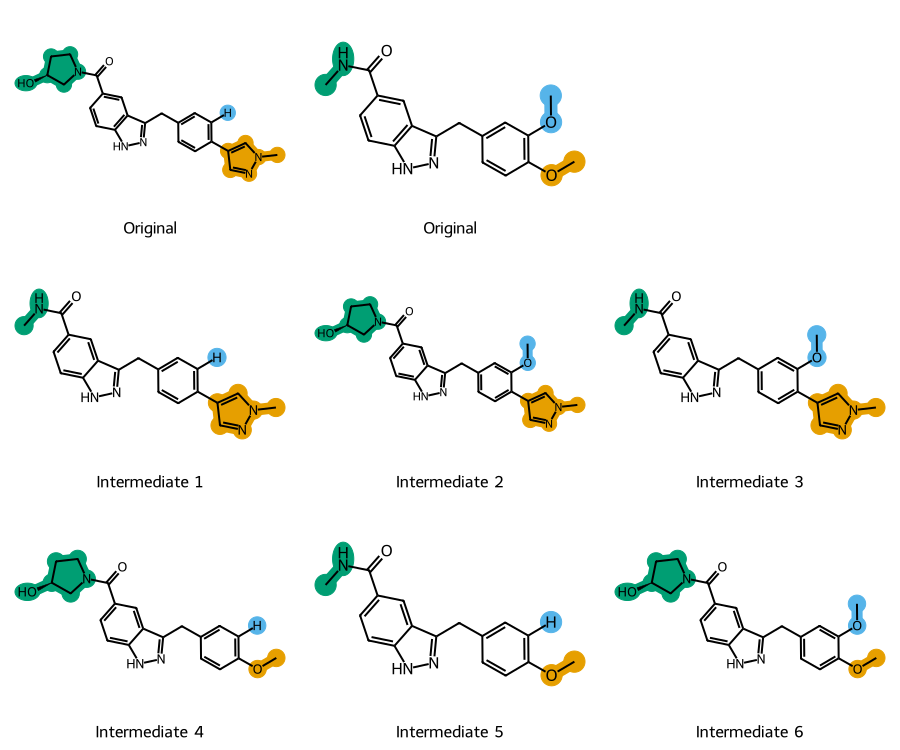

In [4]:
import glob
from itertools import combinations
dir = 'cdk8'
path = "/zfsdata/data/linde/fep_intermediate_generation/ligands/"
addendum = '*.sdf'
mols = []
for file in glob.glob(path + dir + '/' + addendum):
    mol = Chem.rdmolfiles.SDMolSupplier(file)[0]
    mols.append(mol)

num = 0
for i, (liga, ligb) in enumerate(combinations(mols, 2)):
    # if Chem.MolToSmiles(ligb) == 'Clc1ccc2c(c1)[C@H]1OCCC[C@H]1[C@H](c1ccccc1)N2': continue
    print(Chem.MolToSmiles(liga), Chem.MolToSmiles(ligb))
    generator = EnumRGroups()
    liga = Chem.Mol(liga)
    ligb = Chem.Mol(ligb)
    df_interm, core = generator.generate_intermediates([liga, ligb])
    if len(df_interm) > 2:
        generated_interm = df_interm['Intermediate'].tolist()
        num += 1
        if num > 1:
            image = plot_highlighted(liga, ligb, generated_interm, core)
            image
            display(image)
            break